### Importing relevant libraries

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [12]:
batch_size = 128

### Using ImageDataGenerator to generate batches of tensor image data with real-time data augmentation on the 'train' images

In [14]:
generator_train = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

In [15]:
generator_validation = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input)

### Applying the generator to the 'train' and 'validation' datasets 

In [16]:
training_data = generator_train.flow_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',                                          
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(224,224))

Found 69008 images belonging to 38 classes.


In [17]:
validation_data = generator_validation.flow_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    shuffle=False,
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(224,224))

Found 17255 images belonging to 38 classes.


## Model Building 

### VGG16: Sixteen layers deep CNN (a total of around 138 million parameters)

In [18]:
initial_model=VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
initial_model.trainable=False

In [19]:
model=Sequential()
model.add(initial_model)
model.add(Flatten())
model.add(Dense(38,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 38)                953382    
                                                                 
Total params: 15,668,070
Trainable params: 953,382
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [21]:
train = training_data.samples
val = validation_data.samples

In [ ]:
model.fit_generator(training_data,
                    steps_per_epoch=train//batch_size,
                    validation_data=validation_data,
                    epochs=5,
                    validation_steps=val//batch_size)

In [35]:
class_dict = {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato___Leaf_Mold': 31, 'Tomato___Septoria_leaf_spot': 32, 'Tomato___Spider_mites Two-spotted_spider_mite': 33, 'Tomato___Target_Spot': 34, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 'Tomato___Tomato_mosaic_virus': 36, 'Tomato___healthy': 37}
li = list(class_dict.keys())

## Testing on the files in 'test' folder -

1/1 [==============================] - 0s 325ms/step


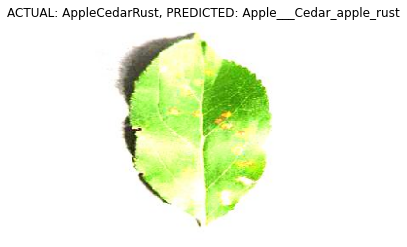

1/1 [==============================] - 0s 318ms/step


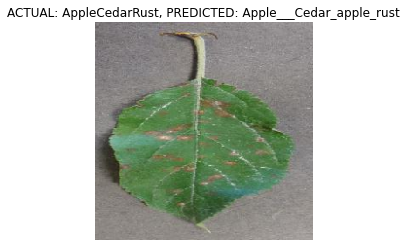

1/1 [==============================] - 0s 292ms/step


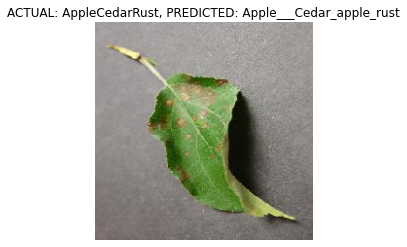

1/1 [==============================] - 0s 300ms/step


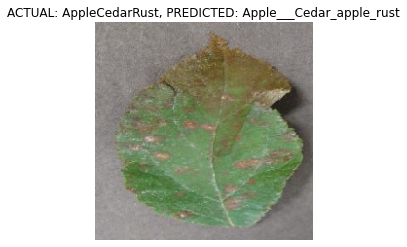

1/1 [==============================] - 0s 304ms/step


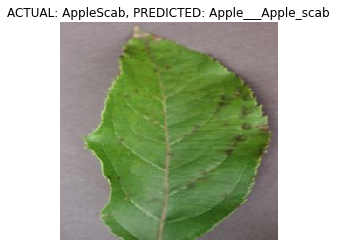

1/1 [==============================] - 0s 294ms/step


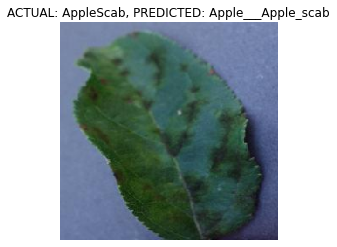

1/1 [==============================] - 0s 298ms/step


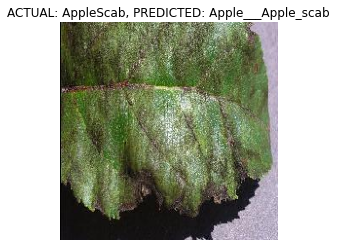

1/1 [==============================] - 0s 323ms/step


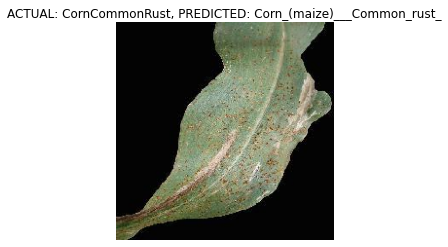

1/1 [==============================] - 0s 300ms/step


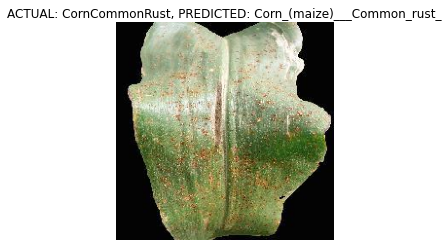

1/1 [==============================] - 0s 312ms/step


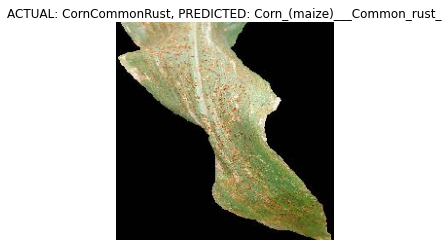

1/1 [==============================] - 0s 314ms/step


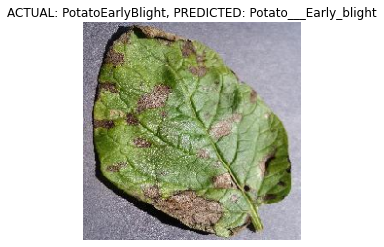

1/1 [==============================] - 0s 313ms/step


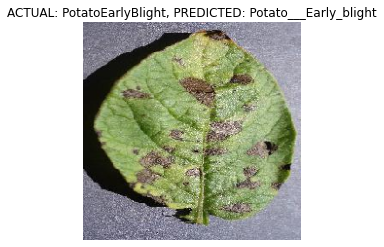

1/1 [==============================] - 0s 302ms/step


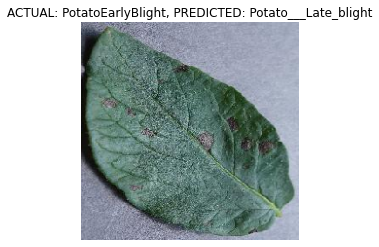

1/1 [==============================] - 0s 306ms/step


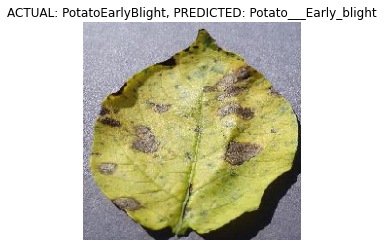

1/1 [==============================] - 0s 284ms/step


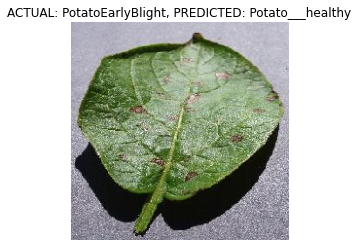

1/1 [==============================] - 0s 283ms/step


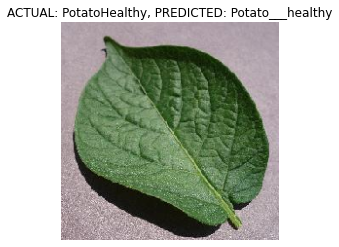

1/1 [==============================] - 0s 244ms/step


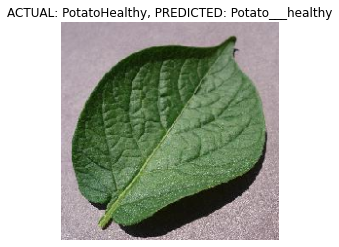

1/1 [==============================] - 0s 327ms/step


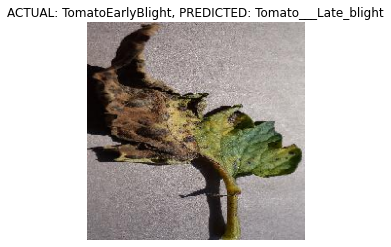

1/1 [==============================] - 0s 319ms/step


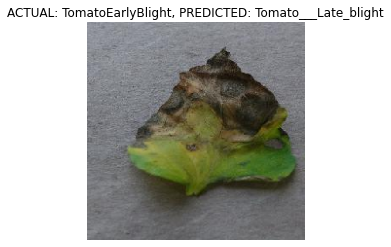

1/1 [==============================] - 0s 285ms/step


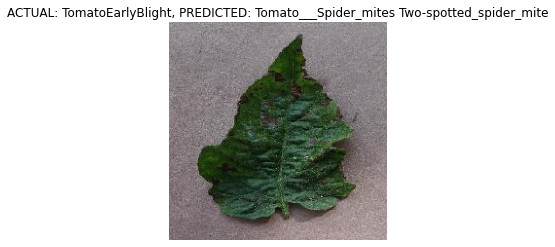

1/1 [==============================] - 0s 331ms/step


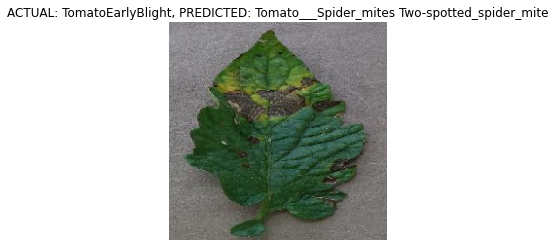

1/1 [==============================] - 0s 255ms/step


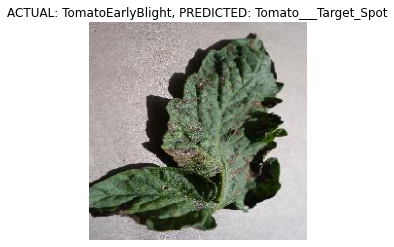

1/1 [==============================] - 0s 280ms/step


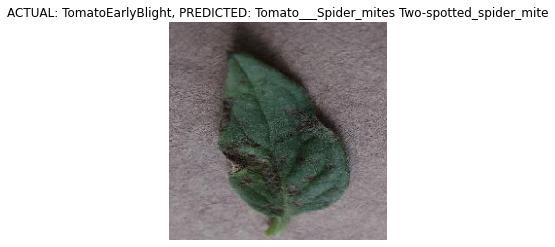

1/1 [==============================] - 0s 307ms/step


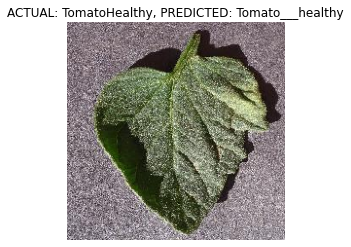

1/1 [==============================] - 0s 297ms/step


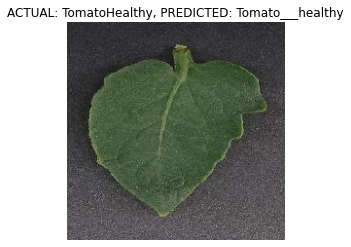

1/1 [==============================] - 0s 326ms/step


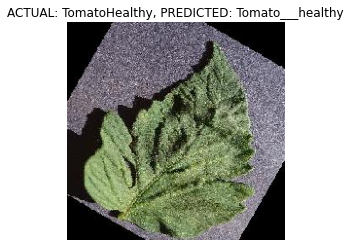

1/1 [==============================] - 0s 295ms/step


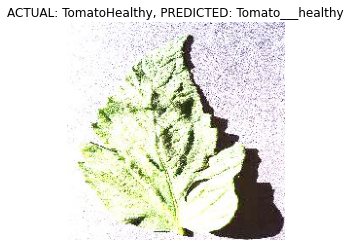

1/1 [==============================] - 0s 278ms/step


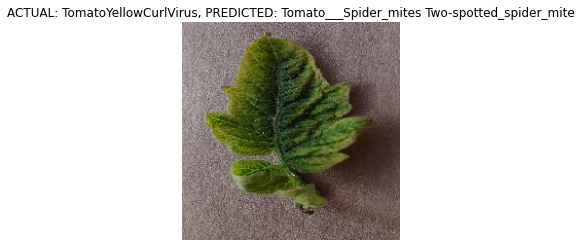

1/1 [==============================] - 0s 309ms/step


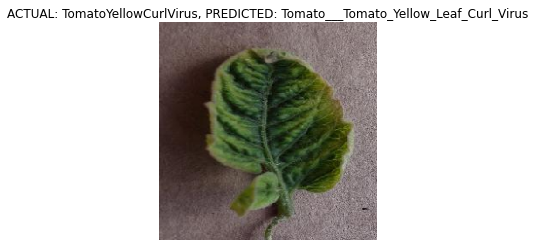

1/1 [==============================] - 0s 320ms/step


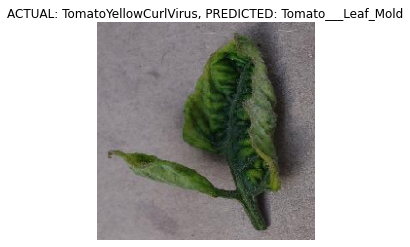

1/1 [==============================] - 0s 308ms/step


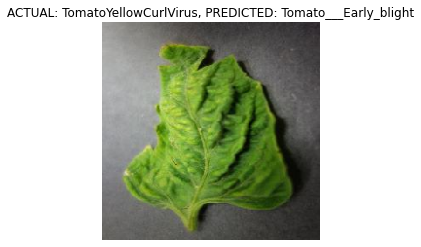

1/1 [==============================] - 0s 301ms/step


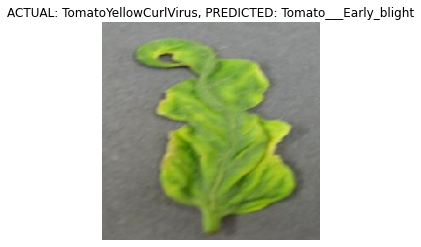

1/1 [==============================] - 0s 285ms/step


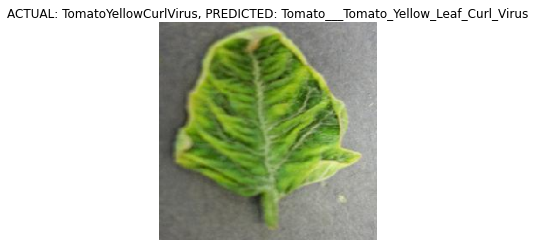

In [53]:
# loading image one by one from the test folder -
for i in os.listdir("test"):
    image_path = os.path.join("test/"+i)
    loaded_img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(loaded_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    # predicting the image -
    prediction = model.predict(img)
    fl = prediction.flatten()
    flm = fl.max()
    for index,item in enumerate(fl):
        if item == flm:
            class_name = li[index]
    # displaying image with the actual and predicted label        
    plt.figure(figsize = (4,4))
    plt.imshow(loaded_img)
    plt.axis('off')
    plt.title("ACTUAL: {}, PREDICTED: {}".format(image_path[5:-5],class_name))
    plt.show()

### Saving the model

In [56]:
model.save("leaf_cnn.h5")